<a href="https://colab.research.google.com/github/chris-kehl/fast.ai_bearClassifier/blob/main/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:

#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [32]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Setup Microsoft Bing keys used to search and scrape images from the web.

In [33]:
key = os.environ.get('AZURE_SEARCH_KEY', '8d45d7506c8e4e78ad0804f1dbea420f')

In [34]:
search_images_bing

<function fastbook.search_images_bing>

In [35]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [36]:

ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [37]:
dest = 'grizzly.jpg'
download_url(ims[0], dest)



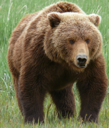

In [38]:
im = Image.open(dest)
im.to_thumb(128,128)

Setup directory and folder used to store the images. Check downloaded images for any failed downloads.

In [39]:
bear_types = 'grizzly', 'black', 'teddy', 'polar'
path = Path('bears')

In [40]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} bear')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [41]:
fns = get_image_files(path)
fns

(#536) [Path('bears/polar/00000137.jpg'),Path('bears/polar/00000060.jpg'),Path('bears/polar/00000079.jpg'),Path('bears/polar/00000049.jpg'),Path('bears/polar/00000070.jpg'),Path('bears/polar/00000121.jpg'),Path('bears/polar/00000047.jpg'),Path('bears/polar/00000006.jpg'),Path('bears/polar/00000004.jpg'),Path('bears/polar/00000058.jpg')...]

In [42]:
failed = verify_images(fns)
failed

(#0) []

In [43]:
failed

(#0) []

In [44]:
# remove failed files
failed.map(Path.unlink);

Format the downloaded data into a format that is suitable for model training. Fastai uses dataloaders.

In [45]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train, valid = add_props(lambda i,self: self[i])

In [46]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

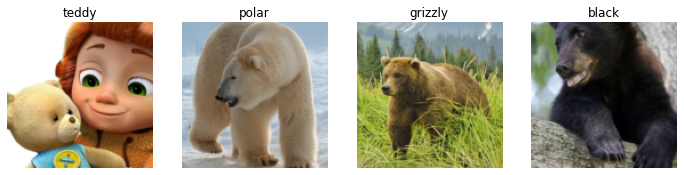

In [47]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

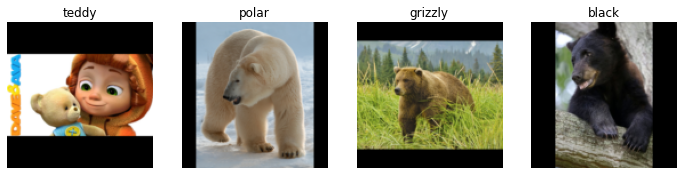

In [48]:
bears = bears.new(item_tfms=Resize(128,
ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

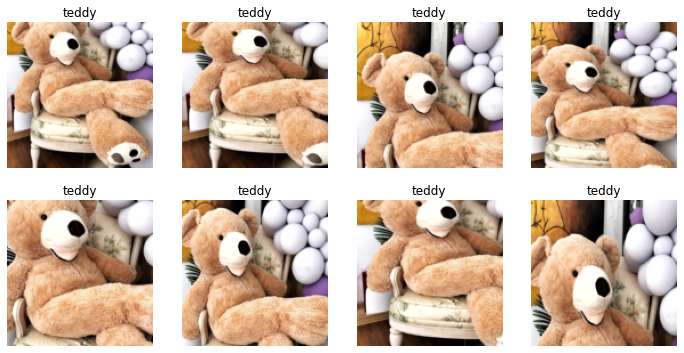

In [49]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Data Augmentation: flip, rotate, change contrast, britness, etc.

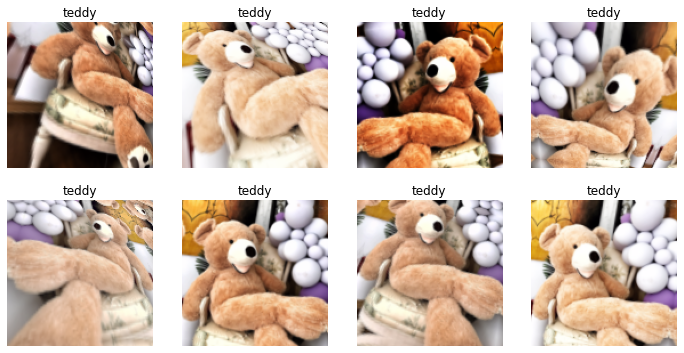

In [50]:
bears = bears.new(item_tfms=Resize(128),
batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Taining the model, cleaning data

In [51]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
batch_tfms=aug_transforms())
dls = bears.dataloaders(path)


In [52]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


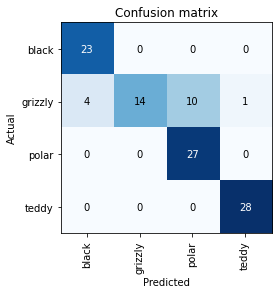

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

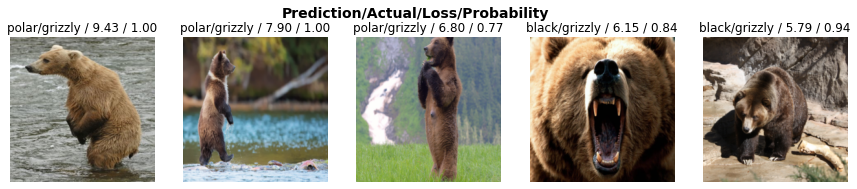

In [54]:
interp.plot_top_losses(5, nrows=1)

In [55]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [57]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()
  

In [58]:
for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), path/cat)

In [59]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


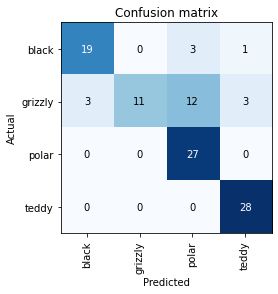

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [62]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [63]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [64]:
for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), path/cat)

In [65]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


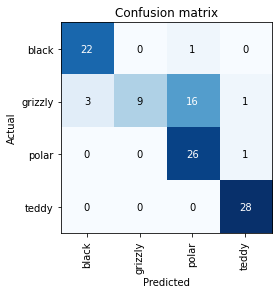

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [67]:
learn.export()


In [68]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [69]:
learn_inf = load_learner(path/'export.pkl')


In [70]:
learn_inf.predict('bears/polar/00000009.jpg')

('polar', tensor(2), tensor([1.1640e-04, 1.2662e-05, 9.9937e-01, 5.0051e-04]))

In [71]:
learn_inf.dls.vocab

['black', 'grizzly', 'polar', 'teddy']

In [72]:
# Web Application
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [109]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [77]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediiction: black; Probability: 0.9715')

In [105]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [102]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl:
    display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [103]:
   btn_run.on_click(on_click_classify)

In [112]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

Bounce this off of the jupyter pages from online book
